# NOTEBOOK DE MISE EN OEUVRE D'UNE APPROCHE NON SUPPERVISEE

### Résumé :


Le projet vise à explorer un ensemble de données de questions et réponses, en utilisant des techniques d'analyse de texte et d'apprentissage automatique non supervisé pour extraire des informations utiles à partir des textes. L'objectif principal est d'identifier les sujets principaux abordés dans les questions et d'explorer les relations entre ces sujets.


### Plan 

Introduction 

Chargement et exploration des données.

- Analyse exploratoire pour comprendre la distribution des questions, des mots les plus fréquents, etc.

Introduction à LDA et son fonctionnement.

- Application de LDA pour extraire les sujets principaux des questions.
- Évaluation de la cohérence des sujets extraits.
- Modélisation NMF (Non-negative Matrix Factorization) :

Introduction à NMF et son fonctionnement.

- Application de NMF pour extraire les sujets principaux des questions.
- Comparaison des résultats avec LDA.
- Analyse et interprétation des résultats :

 Examen des sujets extraits par LDA et NMF.

- Interprétation des mots-clés associés à chaque sujet.
- Comparaison des similitudes et des différences entre les deux approches.

Intégration des résultats :

- Utilisation des distributions de sujets comme nouvelles fonctionnalités pour des tâches supplémentaires (classification, clustering, etc.).
- Fine-tuning des modèles et optimisation des performances.

Conclusion :


### Librairies

In [15]:
import pandas as pd
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, jaccard_score, hamming_loss
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import mlflow
import time
import warnings
from sklearn.exceptions import ConvergenceWarning
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

### Chargement des données

In [16]:
data = pd.read_csv(r'C:\Users\amous\OneDrive\Desktop\projet5\dataAS.csv', sep=',')
from ast import literal_eval
for col in ['Title', 'Body', 'Tags']:
     data[col] = data[col].apply(literal_eval)
data.head()


,Title,Body,Text,Tags
0,"[intercept, mouse, click, from, other, program]","[im, trying, to, intercept, mouse, clicks, fro...",[intercept mouse click from other program im t...,"[c#, .net, winapi, hook, windows-messages]"
1,"[akka, and, state, among, actors, in, cluster]","[i, am, working, on, my, bc, thesis, project, ...",[akka and state among actors in cluster i am w...,"[scala, cluster-computing, akka, actor, akka-c..."
2,"[keeping, the, di, container, usage, in, the, ...","[it, not, quite, clear, to, me, how, i, can, d...",[keeping the di container usage in the composi...,"[c#, silverlight, mvvm, dependency-injection, ..."
3,"[how, can, i, wait, for, the, loop, to, complete]","[let, me, first, show, you, what, the, code, l...",[how can i wait for the loop to complete let ...,"[javascript, node.js, loops, asynchronous, asy..."
4,"[how, to, automate, the, functional, testing, in]","[i, use, the, codecept, functional, testing, f...",[how to automate the functional testing in i ...,"[php, yii, yii2, functional-testing, codeception]"


In [17]:
data.shape

(1000, 4)

In [18]:
data = data.loc[:, ['Title', 'Body', 'Text', 'Tags']]

### Approche avec CountVectorizer et LDA (Latent Dirichlet Allocation) avec Gensim :

In [19]:
import gensim
from pprint import pprint
from gensim.utils import simple_preprocess

# Tokenization
data['Texts_tokenized'] = data['Text'].apply(lambda x: simple_preprocess(x, deacc=True))

id2word = corpora.Dictionary(data['Texts_tokenized'])

# Création du corpus
corpus = [id2word.doc2bow(text) for text in data['Texts_tokenized']]

num_topics = 10

# Construction du modèle LDA
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, 
                                       passes=2, 
                                       iterations=25)

pprint(lda_model.print_topics())

doc_lda = lda_model[corpus]

[(0,
  '0.030*"the" + 0.019*"to" + 0.016*"in" + 0.013*"java" + 0.012*"and" + '
  '0.012*"at" + 0.010*"this" + 0.010*"is" + 0.009*"of" + 0.008*"it"'),
 (1,
  '0.038*"the" + 0.031*"to" + 0.018*"and" + 0.017*"in" + 0.014*"this" + '
  '0.014*"is" + 0.011*"it" + 0.010*"of" + 0.009*"that" + 0.008*"on"'),
 (2,
  '0.022*"java" + 0.022*"the" + 0.018*"org" + 0.015*"at" + 0.014*"to" + '
  '0.013*"version" + 0.012*"in" + 0.012*"dependency" + 0.011*"groupid" + '
  '0.011*"artifactid"'),
 (3,
  '0.034*"the" + 0.019*"to" + 0.019*"in" + 0.015*"is" + 0.014*"and" + '
  '0.010*"this" + 0.008*"of" + 0.008*"it" + 0.008*"that" + 0.006*"my"'),
 (4,
  '0.032*"the" + 0.019*"to" + 0.018*"is" + 0.015*"this" + 0.012*"in" + '
  '0.012*"of" + 0.012*"and" + 0.008*"for" + 0.007*"it" + 0.007*"that"'),
 (5,
  '0.034*"the" + 0.026*"to" + 0.013*"and" + 0.011*"is" + 0.011*"in" + '
  '0.010*"it" + 0.009*"this" + 0.009*"that" + 0.008*"for" + 0.007*"with"'),
 (6,
  '0.051*"the" + 0.028*"to" + 0.015*"in" + 0.014*"is" + 0.013*

Chaque sujet semble représenter une catégorie ou un thème particulier basé sur les termes les plus fréquents trouvés dans les documents du corpus

In [20]:
document_topic_distributions = []

for doc in doc_lda:
    doc_topics = sorted(doc, key=lambda x: x[1], reverse=True)
    document_topic_distributions.append(doc_topics)

for i, doc_topics in enumerate(document_topic_distributions[:5]):
    print(f"Document {i+1}: {doc_topics}")

Document 1: [(6, 0.9981761)]
Document 2: [(1, 0.96938974), (9, 0.02654386)]
Document 3: [(1, 0.7744646), (6, 0.20727426), (3, 0.016547462)]
Document 4: [(9, 0.98952156)]
Document 5: [(1, 0.9888721)]


Ces scores indiquent l'importance relative de chaque sujet dans chaque document. Plus le score est élevé, plus le document est fortement lié à ce sujet.

In [21]:
# Calcul de la cohérence des sujets
coherence_model_lda = CoherenceModel(model=lda_model, texts=data['Texts_tokenized'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f"Score de cohérence du modèle LDA: {coherence_lda}")

Score de cohérence du modèle LDA: 0.5024922596718713


0.48 indique une cohérence modérée entre les mots dans chaque sujet

### Approche avec TF-IDF (Term Frequency-Inverse Document Frequency) et NMF (Non-negative Matrix Factorization) :

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Vectorisation avec TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['Text'])

# Extraction de sujets avec NMF
num_topics = 10  
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(X_tfidf)


NMF(n_components=10, random_state=42)

In [23]:
# Obtention des mots les plus importants pour chaque sujet
feature_names = tfidf_vectorizer.get_feature_names_out()
top_words_per_topic = []
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    top_words_per_topic.append(top_words)
for topic_idx, top_words in enumerate(top_words_per_topic):
    print(f"Sujet {topic_idx + 1}: {', '.join(top_words)}")


Sujet 1: the, to, is, of, and, that, in, it, for, this
Sujet 2: java, org, at, springframework, spring, junit, jar, com, xml, servlet
Sujet 3: android, app, intent, apk, id, item, com, layout_height, layout_width, match_parent
Sujet 4: public, string, class, void, new, static, return, private, null, this
Sujet 5: file, files, to, python, directory, the, error, module, path, pdf
Sujet 6: int, std, const, template, value, return, type, the, unsigned, typename
Sujet 7: app, the, to, user, application, server, web, token, my, api
Sujet 8: js, script, function, src, var, log, console, import, require, angular
Sujet 9: self, model, view, django, cell, py, models, def, import, image
Sujet 10: id, sql, query, table, type, name, select, data, the, to


### Évaluation des modèles non supervisés :


In [24]:
# Calcul de la cohérence des sujets
coherence_model_nmf = CoherenceModel(topics=top_words_per_topic, texts=data['Texts_tokenized'], dictionary=id2word, coherence='c_v')
coherence_nmf = coherence_model_nmf.get_coherence()
print(f"Score de cohérence du modèle NMF: {coherence_nmf}")

Score de cohérence du modèle NMF: 0.6177516478737164


En conclusion, l'approche TF-IDF combinée à NMF semble avoir bien fonctionné pour extraire des sujets significatifs à partir des données textuelles.

-  TSNE 

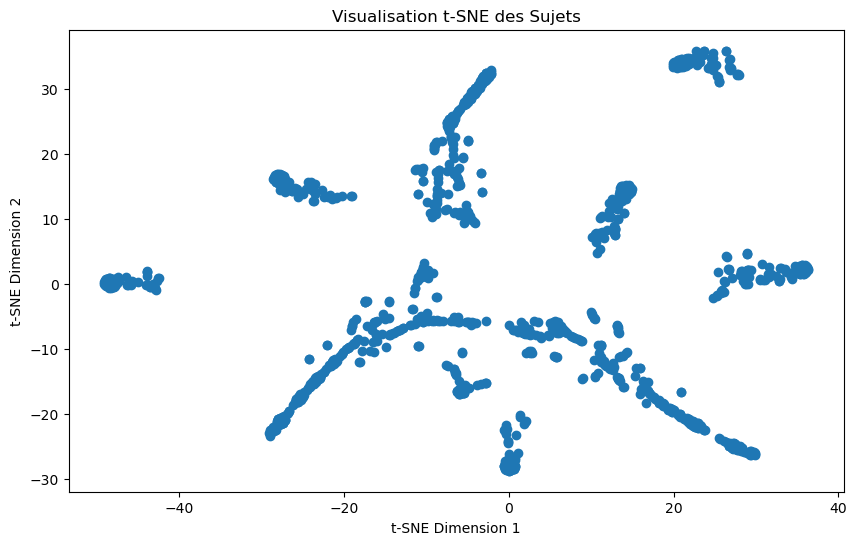

In [25]:
import numpy as np
from sklearn.manifold import TSNE

# Conversion des distributions de sujets en une matrice numpy
doc_topic_matrix = np.zeros((len(document_topic_distributions), num_topics))
for i, doc_topics in enumerate(document_topic_distributions):
    for topic, prob in doc_topics:
        doc_topic_matrix[i, topic] = prob

# Réduction de dimension avec t-SNE
tsne_model = TSNE(n_components=2, random_state=42)
tsne_topics = tsne_model.fit_transform(doc_topic_matrix)

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.scatter(tsne_topics[:, 0], tsne_topics[:, 1])
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Visualisation t-SNE des Sujets')
plt.show()

- Optimisation

In [26]:
from gensim.models import LdaModel, CoherenceModel
import mlflow

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    models = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        models.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return models, coherence_values

models, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data['Texts_tokenized'], start=2, limit=20, step=1)

# Index de la cohérence maximale
optimal_index = coherence_values.index(max(coherence_values))

optimal_num_topics = optimal_index + 2 

 Intégration avec MLFlow 

In [ ]:
# Début du run MLFlow
with mlflow.start_run():
    # Journalisation des paramètres
    mlflow.log_param("num_topics", optimal_num_topics)
    mlflow.log_param("model_type", "LDA")
    # Journalisation des métriques
    mlflow.log_metric("coherence", max(coherence_values))

### Visualisation des résultats :


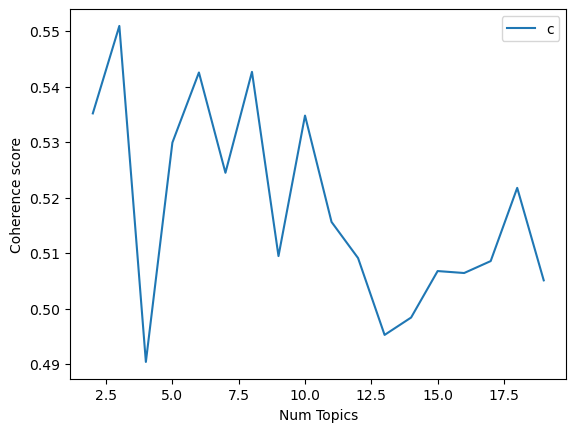

In [27]:
# Définisons le start, limit, step
start = 2
limit = 20
step = 1

# Visualisation coherence values vs. number of topics
plt.plot(range(start, limit, step), coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Conclusion 

De l'analyse des résultats obtenus, on note :

Modèle LDA :

Bien que le modèle LDA ait produit des sujets avec une certaine cohérence thématique, le score de cohérence modéré (0.502) suggère qu'il pourrait y avoir une certaine ambiguïté ou un chevauchement entre les sujets. Cela peut rendre la catégorisation automatique moins précise, car les sujets extraits peuvent ne pas être aussi distincts les uns des autres.

Modèle NMF :

En revanche, le modèle NMF a obtenu un score de cohérence plus élevé (0.618), ce qui indique une meilleure séparation entre les sujets. Les sujets extraits par le NMF peuvent être plus clairs et distincts, ce qui faciliterait la catégorisation automatique des questions de Stack Overflow en fonction de leur contenu.

En conclusion, l'approche utilisant TF-IDF combinée à NMF semble plus prometteuse pour la catégorisation automatique des questions sur Stack Overflow. Les sujets extraits par ce modèle sont probablement plus pertinents et distincts, ce qui peut améliorer la précision du système de catégorisation automatique et fournir une meilleure expérience utilisateur en termes de recherche et de navigation sur la plateforme.